In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
train_data.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [6]:
train_data['Gender'] = train_data['Gender'].replace({'Female': 1, 'Male': 0 })
train_data['Vehicle_Age'] = train_data['Vehicle_Age'].replace({'< 1 Year': 1, '1-2 Year': 2, '> 2 Years': 3 })
train_data['Vehicle_Damage'] = train_data['Vehicle_Damage'].replace({'Yes': 1, 'No': 0 })

In [7]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,1,0,27496.0,152.0,39,0


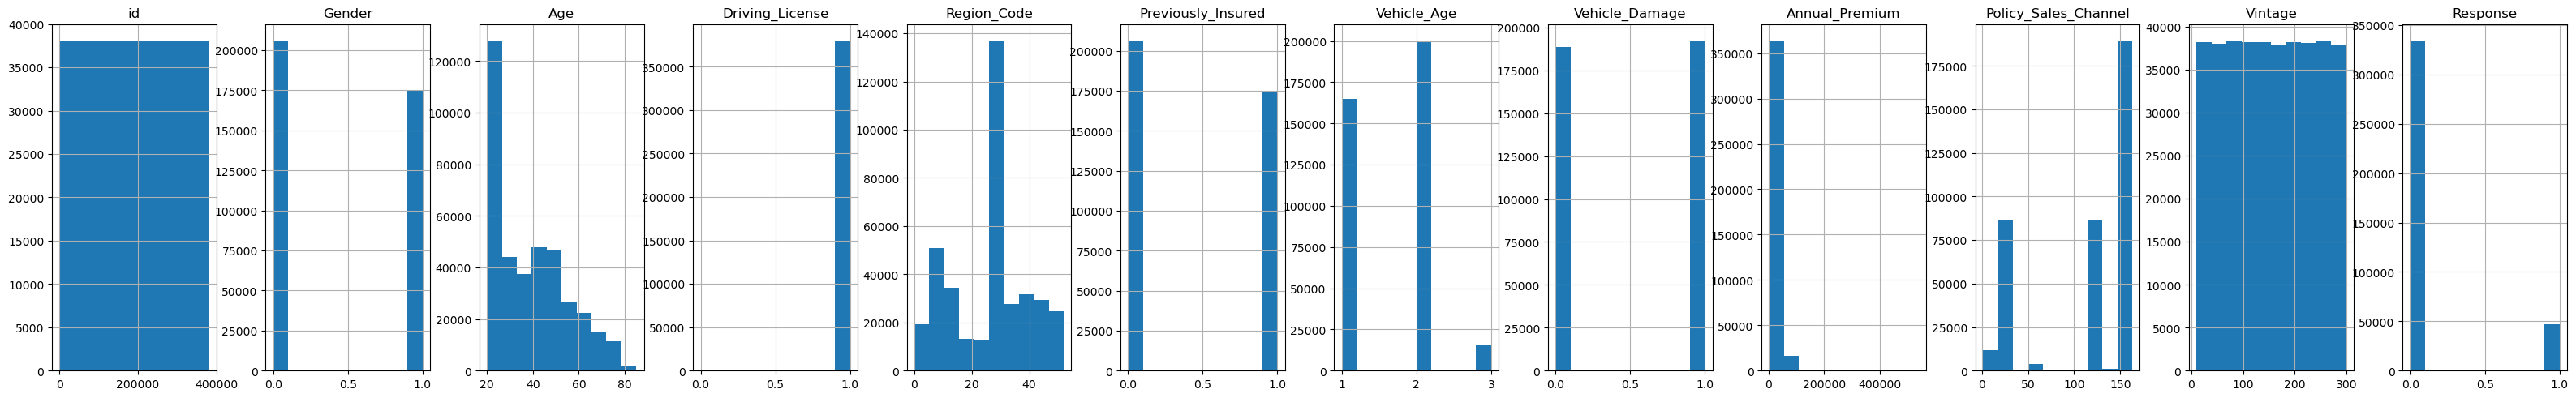

In [8]:
train_data.hist(figsize=(40, 20),layout=(3,12))
plt.show()

In [9]:
train_data.drop('Driving_License', axis=1, inplace=True)
train_data.drop('id', axis=1, inplace=True)

In [10]:
train_data['Policy_Duration'] = train_data['Vintage'] / 365.25  # Assuming Vintage is in days

In [11]:
train_data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Duration
0,0,44,28.0,0,3,1,40454.0,26.0,217,1,0.594114
1,0,76,3.0,0,2,0,33536.0,26.0,183,0,0.501027
2,0,47,28.0,0,3,1,38294.0,26.0,27,1,0.073922
3,0,21,11.0,1,1,0,28619.0,152.0,203,0,0.555784
4,1,29,41.0,1,1,0,27496.0,152.0,39,0,0.106776


In [12]:
train_data, validation_data  = train_test_split(train_data, test_size=0.2, random_state=42)

In [13]:
X_train = train_data.drop('Response', axis=1)
y_train = train_data['Response']

In [14]:
X_val = validation_data.drop('Response', axis=1)
y_val = validation_data['Response']

In [15]:
# Logistic Regression
def logistic_regression(X_train, y_train, X_val, y_val):
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)
    y_pred_lr = logistic_regression.predict(X_val)
    print("Logistic Regression Classification Report:")
    print(classification_report(y_val, y_pred_lr))

# Random Forest
def random_forest(X_train, y_train, X_val, y_val):
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_val)
    print("Random Forest Classification Report:")
    print(classification_report(y_val, y_pred_rf))

# Decision Tree
def decision_tree(X_train, y_train, X_val, y_val):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_val)
    print("Decision Tree Classification Report:")
    print(classification_report(y_val, y_pred_dt))

# k-Nearest Neighbors
def knn(X_train, y_train, X_val, y_val):
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_val)
    print("KNN Classification Report:")
    print(classification_report(y_val, y_pred_knn))

# Naive Bayes
def naive_bayes(X_train, y_train, X_val, y_val):
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)
    y_pred_nb = naive_bayes.predict(X_val)
    print("Naive Bayes Classification Report:")
    print(classification_report(y_val, y_pred_nb))

In [16]:
logistic_regression(X_train, y_train, X_val, y_val)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



In [17]:
random_forest(X_train, y_train, X_val, y_val)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.37      0.10      0.16      9523

    accuracy                           0.87     76222
   macro avg       0.63      0.54      0.55     76222
weighted avg       0.82      0.87      0.83     76222



In [18]:
decision_tree(X_train, y_train, X_val, y_val)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.29      0.30      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



In [19]:
knn(X_train, y_train, X_val, y_val)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     66699
           1       0.21      0.05      0.08      9523

    accuracy                           0.86     76222
   macro avg       0.54      0.51      0.50     76222
weighted avg       0.79      0.86      0.82     76222



In [20]:
naive_bayes(X_train, y_train, X_val, y_val)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     66699
           1       0.31      0.36      0.33      9523

    accuracy                           0.82     76222
   macro avg       0.61      0.62      0.62     76222
weighted avg       0.83      0.82      0.83     76222



In [21]:
def random_forest_feature_importance(X_train, y_train):
    # Initialize and fit the Random Forest model
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)

    # Get feature importance
    feature_importance = random_forest.feature_importances_

    # Display feature importance
    print("Feature Importance:")
    for feature, importance in zip(X_train.columns, feature_importance):
        print(f"{feature}: {importance}")

    # Return the feature importance
    return feature_importance

# Call the function
feature_importance_rf = random_forest_feature_importance(X_train, y_train)

Feature Importance:
Gender: 0.016263028113595573
Age: 0.14215188346134372
Region_Code: 0.09857116140587911
Previously_Insured: 0.048511354617722866
Vehicle_Age: 0.02025915040313318
Vehicle_Damage: 0.07482899006186991
Annual_Premium: 0.20557713458776525
Policy_Sales_Channel: 0.061039739723510573
Vintage: 0.1662128789240287
Policy_Duration: 0.16658467870115107


In [22]:
#after doing feature engineering lets remove gender
train_data.drop(['Gender'], axis=1, inplace=True)

In [23]:
train_data.head()

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Duration
332803,39,15.0,0,2,1,52906.0,55.0,227,1,0.621492
116248,38,11.0,0,2,1,23038.0,26.0,29,0,0.079398
255005,22,30.0,1,1,0,45318.0,152.0,166,0,0.454483
317474,23,41.0,1,1,0,29132.0,151.0,277,0,0.758385
344212,56,48.0,0,3,1,2630.0,154.0,155,0,0.424367


In [24]:
train_data, validation_data  = train_test_split(train_data, test_size=0.2, random_state=42)

In [25]:
X_train = train_data.drop('Response', axis=1)
y_train = train_data['Response']

In [26]:
X_val = validation_data.drop('Response', axis=1)
y_val = validation_data['Response']

In [27]:
random_forest(X_train, y_train, X_val, y_val)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     53490
           1       0.36      0.11      0.17      7488

    accuracy                           0.87     60978
   macro avg       0.63      0.54      0.55     60978
weighted avg       0.82      0.87      0.83     60978



In [28]:
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [29]:
random_forest(X_train_oversampled, y_train_oversampled, X_val, y_val)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     53490
           1       0.33      0.25      0.29      7488

    accuracy                           0.85     60978
   macro avg       0.62      0.59      0.60     60978
weighted avg       0.83      0.85      0.84     60978



In [30]:
from sklearn.model_selection import GridSearchCV
 
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest Classifier
rf_classifier = RandomForestClassifier()

In [31]:
# Grid Search with Random Oversampler
oversampled_rf = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=5)
oversampled_rf.fit(X_train_oversampled, y_train_oversampled)

best_os_rf_model = oversampled_rf.best_estimator_

# Print the best parameters and best accuracy for Random Oversampler
print("Best parameters for Random Oversampler:", oversampled_rf.best_params_)
print("Best accuracy for Random Oversampler:", oversampled_rf.best_score_)

Best parameters for Random Oversampler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy for Random Oversampler: 0.951556883432146


In [32]:
import joblib

joblib.dump(best_os_rf_model, 'best_oversampler_rf_model.pkl')

['best_oversampler_rf_model.pkl']